In [34]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.decomposition import PCA

from scipy.spatial import distance




In [35]:
##LOADING CLEANED DATA

players_2018 = pd.read_csv('players_cleaned.csv')
players_2018 = players_2018.drop(['Unnamed: 0'], axis = 1)
players_2018 = players_2018.fillna(0)
players_2018.shape

(664, 51)

In [36]:
players_2018.head()

,Player,Pos_x,Age_x,Tm_x,G_x,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,as_caliber
0,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,5.0,12.7,0.395,3.7,9.7,0.380,1.4,3.1,0.443,1.7,2.0,0.848,1.1,3.9,5.0,1.2,1.7,0.4,1.1,5.4,15.4,116.0,110,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1,0
1,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,4.6,13.0,0.356,3.6,10.4,0.349,1.0,2.6,0.384,1.8,2.1,0.817,1.4,7.8,9.2,2.0,1.2,1.0,2.1,5.3,14.7,99.0,110,8.2,0.525,0.800,0.164,3.1,17.1,10.0,6.0,1.2,1.6,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1,0
2,Steven Adams\adamsst01,C,24,OKC,76,76,2487,8.9,14.2,0.629,0.0,0.0,0.000,8.9,14.2,0.631,3.2,5.7,0.559,7.7,6.0,13.7,1.8,1.8,1.6,2.6,4.3,21.1,125.0,107,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3,1
3,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,6.4,12.5,0.512,0.0,0.3,0.000,6.4,12.2,0.523,4.7,6.6,0.721,4.3,9.7,14.0,3.7,1.2,1.5,2.4,5.1,17.5,116.0,105,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8,0
4,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,4.7,11.6,0.401,1.9,5.0,0.386,2.7,6.6,0.413,1.6,1.9,0.846,0.3,4.5,4.7,2.2,0.3,0.6,1.5,4.0,12.8,98.0,115,5.8,0.516,0.432,0.160,0.6,10.1,5.3,6.2,0.3,1.1,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7,0


In [37]:
#FEATURE SELECTION

#DROP FEATURES THAT ARE RELATED TO PLAYER SUCCESS
## as_caliber, VORP, BPM, WS/48, WS, GS G_x, MP_x 

#drop success metrics, features that have a strong correlation with how good a player is not style of play
#this isnt that good
#players_select = players_2018.drop(['as_caliber', 'VORP', 'BPM', 'WS/48', 'MP_x', 'GS', 'G_x', 'MP_x'], axis = 1)

#drop percent metrics
#this is pretty good
#gives me a weird role player cluster
#gives me cluster for all around guard and all around big...
#players_select = players_2018.drop(['Age_x', 'FG','FGA', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'PER','as_caliber', 'TS%', 'VORP', 'OBPM', 'DBPM', 'BPM', 'WS', 'WS/48', 'USG%', 'GS', 'G_x', 'MP_x'], axis = 1)

#drop raw metrics
#players_select = players_2018.drop(['Age_x', 'FG','FGA','3P','3PA','2P','2PA','FT','FTA','ORB','DRB','TRB','AST','STL','BLK','TOV','PER','as_caliber', 'TS%', 'VORP', 'OBPM', 'DBPM', 'BPM', 'WS', 'WS/48', 'USG%', 'GS', 'G_x', 'MP_x'], axis = 1)

#don't drop any metrics
#pretty decent, has weird cluster of stars that are central on pc1 pc2
players_select = players_2018


players_select.head()


,Player,Pos_x,Age_x,Tm_x,G_x,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,as_caliber
0,Alex Abrines\abrinal01,SG,24,OKC,75,8,1134,5.0,12.7,0.395,3.7,9.7,0.380,1.4,3.1,0.443,1.7,2.0,0.848,1.1,3.9,5.0,1.2,1.7,0.4,1.1,5.4,15.4,116.0,110,9.0,0.567,0.759,0.158,2.5,8.9,5.6,3.4,1.7,0.6,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1,0
1,Quincy Acy\acyqu01,PF,27,BRK,70,8,1359,4.6,13.0,0.356,3.6,10.4,0.349,1.0,2.6,0.384,1.8,2.1,0.817,1.4,7.8,9.2,2.0,1.2,1.0,2.1,5.3,14.7,99.0,110,8.2,0.525,0.800,0.164,3.1,17.1,10.0,6.0,1.2,1.6,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1,0
2,Steven Adams\adamsst01,C,24,OKC,76,76,2487,8.9,14.2,0.629,0.0,0.0,0.000,8.9,14.2,0.631,3.2,5.7,0.559,7.7,6.0,13.7,1.8,1.8,1.6,2.6,4.3,21.1,125.0,107,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3,1
3,Bam Adebayo\adebaba01,C,20,MIA,69,19,1368,6.4,12.5,0.512,0.0,0.3,0.000,6.4,12.2,0.523,4.7,6.6,0.721,4.3,9.7,14.0,3.7,1.2,1.5,2.4,5.1,17.5,116.0,105,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8,0
4,Arron Afflalo\afflaar01,SG,32,ORL,53,3,682,4.7,11.6,0.401,1.9,5.0,0.386,2.7,6.6,0.413,1.6,1.9,0.846,0.3,4.5,4.7,2.2,0.3,0.6,1.5,4.0,12.8,98.0,115,5.8,0.516,0.432,0.160,0.6,10.1,5.3,6.2,0.3,1.1,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7,0


In [38]:
##STANDARDIZE DATA FOR LDA
# p_standardized  = pd.DataFrame(StandardScaler().fit_transform(players_select.select_dtypes(exclude='object')))
p_standardized = players_select.select_dtypes(exclude='object')

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2, solver='eigen', shrinkage='auto' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df)
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']


LDA.score(p_standardized,players_2018['Pos_x'])


0.6189759036144579

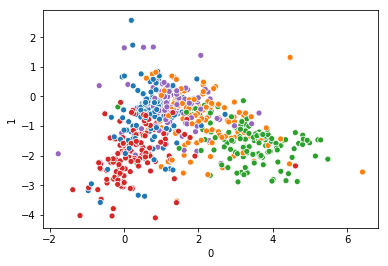

In [40]:
plt.figure()
sns.scatterplot(x=0, y =1, hue ="Pos_x", data = LDA_reduced_df, legend = False )


In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=2, solver='svd' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df)
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']


LDA.score(p_standardized,players_2018['Pos_x'])


0.6566265060240963

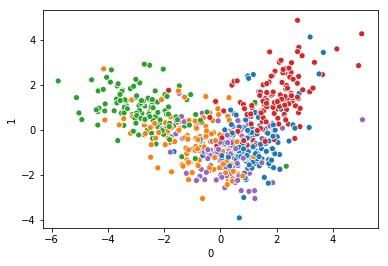

In [42]:
plt.figure()
sns.scatterplot(x=0, y =1, hue ="Pos_x", data = LDA_reduced_df, legend = False )


For n_clusters = 2 The average silhouette_score is : 0.4967467836126292
For n_clusters = 3 The average silhouette_score is : 0.48416486993536856
For n_clusters = 4 The average silhouette_score is : 0.40564495364294895
For n_clusters = 5 The average silhouette_score is : 0.36070909261491774
For n_clusters = 6 The average silhouette_score is : 0.34295353765235476
For n_clusters = 7 The average silhouette_score is : 0.336367150400236
For n_clusters = 8 The average silhouette_score is : 0.3384970360463483
For n_clusters = 9 The average silhouette_score is : 0.33001846403618773


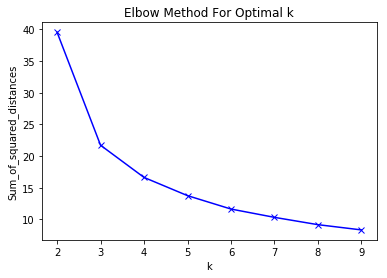

In [46]:
## Number of Cluster Analysis LDA = 2

#DECIDED ON # of Components = 2 to represent 29% of variance
# pca = PCA(n_components = 2)
# principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', ])#'principal component 3'])#, 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])
LDA = LinearDiscriminantAnalysis(n_components=2, solver='eigen' )
LDA_reduced_df = LDA.fit(p_standardized,players_2018['Pos_x']).transform(p_standardized)
LDA_reduced_df = pd.DataFrame(LDA_reduced_df, columns = ['principal component 1', 'principal component 2', ])

Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(LDA_reduced_df)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(LDA_reduced_df, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [47]:
##CLUSTER ANALYSIS


k = 8
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(LDA_reduced_df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

LDA_reduced_df['Cluster'] = labels
LDA_reduced_df['Player'] = players_2018['Player']
LDA_reduced_df['Pos_x'] = players_2018['Pos_x']
LDA_reduced_df

,principal component 1,principal component 2,Cluster,Player,Pos_x
0,-2.816060,-0.769838,0,Alex Abrines\abrinal01,SG
1,-2.961148,-0.806054,5,Quincy Acy\acyqu01,PF
2,-3.347582,-0.581498,3,Steven Adams\adamsst01,C
3,-3.328886,-0.411389,3,Bam Adebayo\adebaba01,C
4,-2.847210,-0.687597,6,Arron Afflalo\afflaar01,SG
5,-3.380093,-0.487443,3,Cole Aldrich\aldrico01,C
6,-3.220229,-0.491763,3,LaMarcus Aldridge\aldrila01,C
7,-3.440092,-0.493692,1,Jarrett Allen\allenja01,C
8,-2.615877,-0.404727,2,Kadeem Allen\allenka01,PG
9,-3.004781,-0.651429,5,Tony Allen\allento01,SF


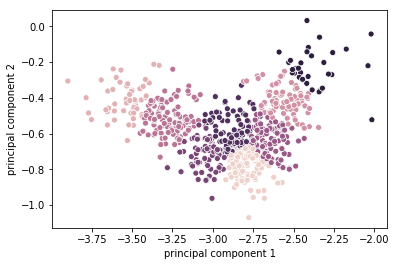

In [48]:
plt.figure()
sns.scatterplot(x='principal component 1', y ='principal component 2', hue ="Cluster", data = LDA_reduced_df, legend = False )


In [49]:
players_2018['PC1'] = LDA_reduced_df['principal component 1']
players_2018['PC2'] = LDA_reduced_df['principal component 2']
players_2018['Cluster'] = LDA_reduced_df['Cluster']

In [50]:
players_2018.to_csv('players_clustered.csv')